### Задание 1

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,6

In [4]:
df = pd.read_csv('vgsales.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
genres_mean = df[['Genre', 'Critic_Score']].groupby('Genre').mean().sort_values(by='Critic_Score', ascending = True)

In [6]:
genres_median = df[['Genre', 'Critic_Score']].groupby('Genre').median().sort_values(by='Critic_Score', ascending = True)

In [7]:
genres_mean

,Critic_Score
Genre,
Adventure,65.331269
Misc,66.619503
Action,66.629101
Puzzle,67.424107
Racing,67.963612
Platform,68.058350
Simulation,68.619318
Fighting,69.217604
Shooter,70.181144


<AxesSubplot:title={'center':'Mean_Critic_Score'}, xlabel='Genre', ylabel='Critic_Score'>

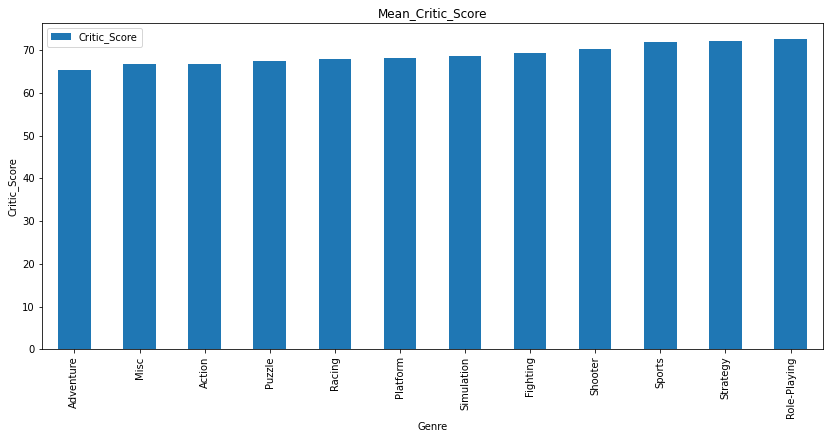

In [8]:
genres_mean.plot(kind='bar', title='Mean_Critic_Score', xlabel='Genre', ylabel='Critic_Score')

<AxesSubplot:title={'center':'Median_Critic_Score'}, xlabel='Genre', ylabel='Critic_Score'>

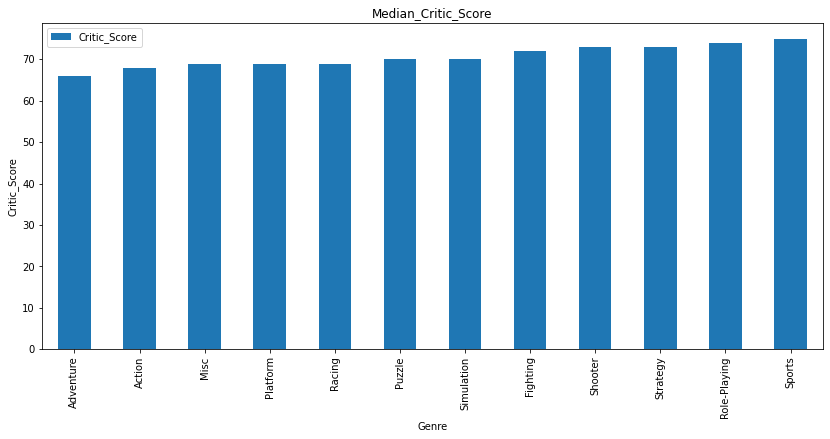

In [9]:
genres_median.plot(kind='bar', title='Median_Critic_Score', xlabel='Genre', ylabel='Critic_Score')

### Итак, мы видим, что критики довольно хорошо оценивают спортивные игры - средняя оценка почти 72 (топ-3 по жанрам), а медианный показатель вообще на первом месте.

__________________________________________________________________________________

Н0: критикам одинаково нравятся продукция PC and PS4 (значимых различий нет)

Н1: статистически значимый перевес в оценках есть (по знаку поймем в чью сторону)

In [10]:
pc = df[df['Platform'] == 'PC'].dropna()

In [11]:
ps4 = df[df['Platform'] == 'PS4'].dropna()

In [12]:
from scipy import stats as st

In [13]:
result = st.ttest_ind(pc['Critic_Score'], ps4['Critic_Score'])
print(result)


Ttest_indResult(statistic=4.171226938400564, pvalue=3.327048050983269e-05)


p-value очень мал - отбрасываем Н0 - отличия есть и они не случайны и они в пользу оценок ПК

In [14]:
print(pc.Critic_Score.mean())
ps4.Critic_Score.mean()

76.26113671274962


72.66945606694561

___________________________________________________________________________________________________________________

Н0: критикам одинаково нравятся продукция стрелялки и стратегии (значимых различий нет)

Н1: статистически значимый перевес в оценках есть (по знаку поймем в чью сторону)

In [15]:
shooter = df[df['Genre'] == 'Shooter'].dropna()

In [16]:
rts = df[df['Genre'] == 'Strategy'].dropna()

In [17]:
result = st.ttest_ind(shooter['Critic_Score'], rts['Critic_Score'])
print(result)

Ttest_indResult(statistic=-2.2226798407665562, pvalue=0.026434882544039348)


p-value мал - отбрасываем Н0 - отличия есть и они не случайны и они в пользу оценок стратегий.

In [18]:
print(shooter.Critic_Score.mean())
rts.Critic_Score.mean()

70.98148148148148


73.12359550561797

### Задание 2

In [19]:
spam = pd.read_csv('spam.csv')

In [20]:
spam['Message'] = spam.Message.str.lower()
spam

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


In [21]:
import re

In [22]:
spam['Message'] = [re.sub('[\W_]+',' ', text) for text in spam['Message']]

In [23]:
spam['Message']

0       go until jurong point crazy available only in ...
1                                ok lar joking wif u oni 
2       free entry in 2 a wkly comp to win fa cup fina...
3            u dun say so early hor u c already then say 
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home 
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: Message, Length: 5572, dtype: object

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\allie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))
spam['Message'] = spam['Message'].apply(lambda row: ' '.join([word for word in row.split() if word not in sw]))

In [26]:
spam

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though
...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,ü b going esplanade fr home
5569,ham,pity mood suggestions
5570,ham,guy bitching acted like interested buying some...


In [27]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
wl = WordNetLemmatizer()
spam['Message'] = spam['Message'].apply(lambda row: ' '.join([wl.lemmatize(word) for word in row.split()]))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\allie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
spam

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though
...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,ü b going esplanade fr home
5569,ham,pity mood suggestion
5570,ham,guy bitching acted like interested buying some...


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(spam.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
tfidf_matrix.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, spam['Category'], test_size=0.30, random_state=42)

In [32]:
lda = LinearDiscriminantAnalysis()

In [33]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test, lda.predict(X_test))

array([[1445,    3],
       [  51,  173]], dtype=int64)

In [36]:
spam

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though
...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,ü b going esplanade fr home
5569,ham,pity mood suggestion
5570,ham,guy bitching acted like interested buying some...


In [40]:
pred = pd.DataFrame()

In [42]:
pred['real_category'] = y_test
pred['prediction'] = lda.predict(X_test)

In [44]:
pred_diff = pred[pred['real_category'] != pred['prediction']]

In [48]:
pred_diff.head()

,real_category,prediction
2422,ham,spam
881,spam,ham
1961,spam,ham
3864,spam,ham
2575,spam,ham


In [50]:
pred_diff.join(spam.Message)

,real_category,prediction,Message
2422,ham,spam,err cud going 8pm got way contact
881,spam,ham,reminder downloaded content already paid goto ...
1961,spam,ham,guess somebody know secretly fancy wanna find ...
3864,spam,ham,oh god found number glad text back xafter msg ...
2575,spam,ham,next amazing xxx picsfree1 video sent enjoy on...
2402,spam,ham,babe u want dont u baby im nasty thing 4 filth...
4527,spam,ham,want cock hubby away need real man 2 satisfy t...
1924,ham,spam,hello going village pub 8 either come accordin...
2663,spam,ham,hello darling today would love chat dont tell ...
1022,spam,ham,guess somebody know secretly fancy wanna find ...
